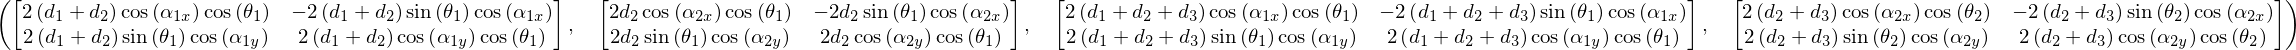

In [4]:
import sympy
from sympy import *
import numpy as np
init_printing(use_unicode=True)
from matplotlib import rc
import mpmath
import pandas as pd
import matplotlib.pylab as plt


d1, d2, d3,d4, cx1, cy1, cx2, cy2 = symbols( 'd_1 d_2  d_3 d_4 alpha_1x alpha_1y alpha_2x alpha_2y')
varx1, vary1,varx2, vary2, theta1, theta2 = symbols('delta_1x delta_1y delta_2x delta_2y theta_1 theta_2')

prop1 = Matrix([[d1, 0],[0, d1]])
prop2 = Matrix([[d2, 0],[0, d2]])

axis1 = Matrix([[2*cos(cx1), 0],[0, 2*cos(cy1)]])
axis2 = Matrix([[2*cos(cx2), 0],[0, 2*cos(cy2)]])

mirror1 = Matrix([ [tan(2*varx1),0], [0, tan(2*vary1)] ])
rot1 = Matrix([[cos(theta1), -sin(theta1)],[sin(theta1), cos(theta1)]])

beamline_1 = prop2*axis1*rot1

vec = Matrix([[varx1], [vary1]])


def subset_matrix_system(d_s, chief_x, chief_y, angle_rot):
    prop2 = Matrix([[d_s, 0],[0, d_s]])

    axis1 = Matrix([[2*cos(chief_x), 0],[0, 2*cos(chief_y)]])

    rot1 = Matrix([[cos(angle_rot), -sin(angle_rot)],[sin(angle_rot), cos(angle_rot)]])

    beamline_1 = prop2*axis1*rot1
    return(beamline_1)

ccd1_distance = d1+d2
ccd2_distance = d2+d3

m1_nxt = subset_matrix_system(ccd1_distance, cx1, cy1, theta1)
m2_nxt = subset_matrix_system(ccd2_distance, cx2, cy2, theta2)

m2_xt = subset_matrix_system(d2, cx2, cy2, theta1)
m1_xt = subset_matrix_system(d1+d2+d3, cx1, cy1, theta1)


two_mirror_system =  Matrix([ [m1_nxt, m2_xt], [m1_xt, m2_nxt] ]) #np.bmat([[m1_nxt, m2_xt], [m1_xt, m2_nxt]])

a= two_mirror_system.diff


(m1_nxt, m2_xt, m1_xt, m2_nxt)

In [6]:
def beamline(dm, chiefx, chiefy, rot_angle):
    chiefx, chiefy, rot_angle = np.deg2rad(chiefx),np.deg2rad(chiefy), np.deg2rad(rot_angle)
    drift = np.matrix([[dm,0], [0,dm]])
    scale = np.matrix([[2*np.cos(chiefx),0], [0,2*np.cos(chiefy)]])
    rot_mirror = np.matrix([[np.cos(rot_angle), -np.sin(rot_angle)], [np.sin(rot_angle),  np.cos(rot_angle)]])
    return(drift*scale*rot_mirror)

a = beamline(400, 45, 0, 90)
a

matrix([[  3.46382422e-14,  -5.65685425e+02],
        [  8.00000000e+02,   4.89858720e-14]])

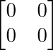

In [77]:
m1_nxt.diff(cx1, cy1)

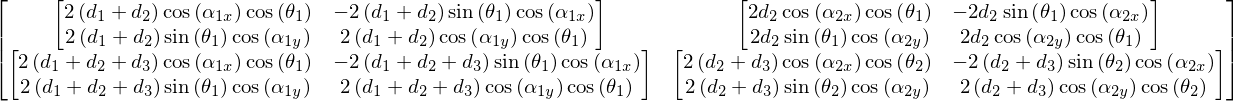

In [72]:
two_mirror_system

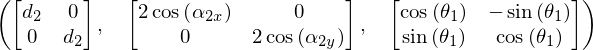

In [39]:
(prop2, axis2, rot1)

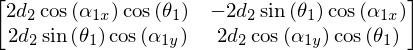

In [40]:
beamline_1

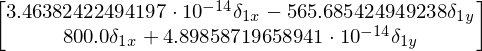

In [46]:
beamline_1.subs([(theta1,np.deg2rad(90)), (cx1,np.deg2rad(45)), (cy1,np.deg2rad(0)), (d2,400)    ])*(vec.subs((varx1, np.deg2rad(1)),(vary1, np.deg2rad(1))))